In [1]:
# !pip install nba-api
# !pip install Keras

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [104]:
# dependencies

# basic
from datetime import datetime
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import ExcelFile
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from pandas.plotting import scatter_matrix
import plotly.express as px
import requests
import seaborn as sns
import time

# nba api
import nba_api
from nba_api.stats.endpoints import BoxScoreDefensive, BoxScoreMiscV2, BoxScorePlayerTrackV2, BoxScoreUsageV2
from nba_api.stats.static import teams
from nba_api.stats.endpoints import LeagueGameFinder, LeagueGameLog, PlayerGameLog

# sklearn
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, Normalizer, StandardScaler
from sklearn.svm import SVC

# tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

In [4]:
plt.style.use('seaborn')

-------
# csv dataset
-------

In [5]:
# df_final = pd.read_csv('/content/drive/My Drive/mo_bucks_ml/current/gamestatsfinal_version_3.csv')
df_final = pd.read_csv('../resources/gamestatsfinal_version_3.csv')

In [6]:
df_final

,AST_PCT,AST_RATIO,AST_TOV,AST,BLK,BLKA,BLK.1,CFGA,CFGM,CFG_PCT,...,TS_TEAM_AVG,UFGA,UFGM,UFG_PCT,USG_PCT,VIDEO_AVAILABLE,WL,YEAR BUILT,ARENA,ATTENDANCE
0,0.214,27.3,3.00,3,0,1,0,2,0,0.000,...,0.480333,5,3,0.600,0.163,1,W,1995,TD Garden,18624
1,0.091,11.1,1.00,2,0,2,0,6,2,0.333,...,0.480333,7,3,0.429,0.229,1,W,1995,TD Garden,18624
2,0.000,0.0,0.00,0,0,1,0,5,1,0.200,...,0.480333,7,3,0.429,0.206,1,W,1995,TD Garden,18624
3,0.095,16.7,0.67,2,4,0,4,3,3,1.000,...,0.480333,4,1,0.250,0.137,1,W,1995,TD Garden,18624
4,0.292,28.0,2.33,7,0,1,0,2,1,0.500,...,0.480333,12,1,0.083,0.247,1,W,1995,TD Garden,18624
5,0.000,0.0,0.00,0,0,0,0,1,1,1.000,...,0.480333,11,6,0.545,0.241,1,W,1995,TD Garden,18624
6,0.000,0.0,0.00,0,0,0,0,0,0,0.000,...,0.480333,0,0,0.000,0.000,1,W,1995,TD Garden,18624
7,0.048,8.3,1.00,1,1,0,1,3,0,0.000,...,0.480333,7,5,0.714,0.167,1,W,1995,TD Garden,18624
8,0.176,30.0,1.50,3,0,0,0,0,0,0.000,...,0.480333,4,2,0.500,0.109,1,W,1995,TD Garden,18624
9,0.250,13.0,3.00,3,0,0,0,5,2,0.400,...,0.480333,12,7,0.583,0.290,1,W,1995,TD Garden,18624


In [7]:
# fix gameid column w/ leading zeros
df_final['GAME_ID'] = df_final['GAME_ID'].map(lambda x: f'{x:0>10}')

In [8]:
df_final.head()

,AST_PCT,AST_RATIO,AST_TOV,AST,BLK,BLKA,BLK.1,CFGA,CFGM,CFG_PCT,...,TS_TEAM_AVG,UFGA,UFGM,UFG_PCT,USG_PCT,VIDEO_AVAILABLE,WL,YEAR BUILT,ARENA,ATTENDANCE
0,0.214,27.3,3.00,3,0,1,0,2,0,0.000,...,0.480333,5,3,0.600,0.163,1,W,1995,TD Garden,18624
1,0.091,11.1,1.00,2,0,2,0,6,2,0.333,...,0.480333,7,3,0.429,0.229,1,W,1995,TD Garden,18624
2,0.000,0.0,0.00,0,0,1,0,5,1,0.200,...,0.480333,7,3,0.429,0.206,1,W,1995,TD Garden,18624
3,0.095,16.7,0.67,2,4,0,4,3,3,1.000,...,0.480333,4,1,0.250,0.137,1,W,1995,TD Garden,18624
4,0.292,28.0,2.33,7,0,1,0,2,1,0.500,...,0.480333,12,1,0.083,0.247,1,W,1995,TD Garden,18624


# player selection

In [9]:
# dfplayerawards = pd.read_csv('/content/drive/My Drive/mo_bucks_ml/current/2019_nba_awards.csv')
dfplayerawards = pd.read_csv('../resources/2019_nba_awards.csv')

In [10]:
players_awarded = dfplayerawards['Player'].unique()

In [11]:
df_final_awarded = df_final.loc[df_final['PLAYER_NAME'].isin(players_awarded)]

# feature selection

In [12]:
list(df_final_awarded.keys())

['AST_PCT',
 'AST_RATIO',
 'AST_TOV',
 'AST',
 'BLK',
 'BLKA',
 'BLK.1',
 'CFGA',
 'CFGM',
 'CFG_PCT',
 'COMMENT',
 'Capacity',
 'Capacity_pct',
 'City',
 'DEF_RATING',
 'DFGA',
 'DFGM',
 'DFG_PCT',
 'DIST',
 'DRBC',
 'DREB_PCT',
 'DREB',
 'EFG_EVAL',
 'EFG_PCT',
 'EFG_TEAM_AVG',
 'E_DEF_RATING',
 'E_NET_RATING',
 'E_OFF_RATING',
 'E_PACE',
 'E_USG_PCT',
 'FG3A',
 'FG3M',
 'FG3_PCT',
 'FGA',
 'FGM',
 'FG_PCT',
 'FTA',
 'FTAST',
 'FTM',
 'FT_PCT',
 'FT_missed',
 'GAME_DATE',
 'GAME_ID',
 'GAMESCORE',
 'Home/Away',
 'Hometeam',
 'MATCHUP',
 'MATCHUP_AST',
 'MATCHUP_FG3A',
 'MATCHUP_FG3M',
 'MATCHUP_FG3_PCT',
 'MATCHUP_FGA',
 'MATCHUP_FGM',
 'MATCHUP_FG_PCT',
 'MATCHUP_MIN',
 'MATCHUP_TOV',
 'MIN',
 'MIN_FLAT',
 'NET_RATING',
 'OFF_RATING',
 'OPP_PTS_2ND_CHANCE',
 'OPP_PTS_FB',
 'OPP_PTS_OFF_TOV',
 'OPP_PTS_PAINT',
 'ORBC',
 'OREB',
 'OREB_PCT',
 'PACE',
 'PACE_PER40',
 'PARTIAL_POSS',
 'PASS',
 'PCT_AST',
 'PCT_BLK',
 'PCT_BLKA',
 'PCT_DREB',
 'PCT_FG3A',
 'PCT_FG3M',
 'PCT_FGA',
 'PCT_F

In [13]:
features = [
    
#   target
    'WL',
    
#   traditional
    'PTS',
    'AST',
    'PF',
#   'DEF_RATING',
#   'OFF_RATING',
    'FG_PCT',
    'FG3M',
    'FTM',
    'FGM',
    'STL',
    'TOV',
    'Home/Away',
    
#   minutes/usage/possession
    'MIN_FLAT',
    'USG_PCT',
    'POSS',
    
#   point types
    'PTS_2ND_CHANCE',
    'PTS_FB',
    'PTS_OFF_TOV',
    'PTS_PAINT',

#   advanced
    'GAMESCORE',
    'EFG_PCT',
    'TS_PCT',
#   eval => pct above or below team average
    'EFG_EVAL',
    'TS_EVAL',
#   team average
    'EFG_TEAM_AVG',
    'TS_TEAM_AVG',
    
#   granular
    'SPD', # speed
    'DIST', # distance
    'ORBC', # oreb chances
    'DRBC', # dreb chances
    'RBC', # reb chances
    'TCHS', # touches
    'SAST', # secondary assists
    'FTAST', # free throw assists
    'PFD', # personal fouls drawn
    'PASS', # passes
    'CFGM', # contested fgm
    'CFGA', # contested fga
    'CFG_PCT', # contested fg pct
    'UFGM', # uncontested fgm
    'UFGA', # uncontested fga
    'UFG_PCT', # uncontested fg pct
    'DFGM', # defended fgm
    'DFGA', # defended fga
    'DFG_PCT', # defended df pct
    
#   percent of team stats
    'PCT_FGM',
    'PCT_FGA',
    'PCT_FG3M',
    'PCT_FG3A',
    'PCT_FTM',
    'PCT_FTA',
    'PCT_OREB',
    'PCT_DREB',
    'PCT_REB',
    'PCT_AST',
    'PCT_TOV',
    'PCT_STL',
    'PCT_BLK',
    'PCT_BLKA',
    'PCT_PF',
    'PCT_PFD',
    'PCT_PTS',
    
#     arena
#    'Capacity_pct',
#    'Capacity',
    
]

In [14]:
len(features)

61

--------
# svc model
--------

In [15]:
df_svc = df_final_awarded[features].copy()

In [16]:
df_svc.head()

,WL,PTS,AST,PF,FG_PCT,FG3M,FTM,FGM,STL,TOV,...,PCT_DREB,PCT_REB,PCT_AST,PCT_TOV,PCT_STL,PCT_BLK,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS
4,W,7,7,1,0.143,1,2,2,0,3,...,0.154,0.129,0.389,0.333,0.000,0.0,0.25,0.077,0.143,0.103
8,W,7,3,2,0.500,2,1,2,0,2,...,0.130,0.091,0.429,0.200,0.000,0.0,0.00,0.182,0.125,0.152
14,L,23,2,3,0.429,1,4,9,1,5,...,0.229,0.250,0.133,0.385,0.200,0.4,0.75,0.200,0.214,0.333
20,L,1,0,0,0.000,0,1,0,0,0,...,0.167,0.125,0.000,0.000,0.000,0.0,0.00,0.000,0.125,0.045
24,W,32,9,4,0.550,5,5,11,1,3,...,0.242,0.167,0.360,0.200,0.167,0.0,0.00,0.182,0.308,0.356


In [17]:
encoder = LabelEncoder()
encoder.fit(df_svc['WL'])
y = encoder.transform(df_svc.WL)
df_svc['y'] = y

In [18]:
encoder = LabelEncoder()
encoder.fit(df_svc['Home/Away'])
home = encoder.transform(df_svc['Home/Away'])
df_svc['HOME'] = home

In [19]:
df_svc

,WL,PTS,AST,PF,FG_PCT,FG3M,FTM,FGM,STL,TOV,...,PCT_AST,PCT_TOV,PCT_STL,PCT_BLK,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS,y,HOME
4,W,7,7,1,0.143,1,2,2,0,3,...,0.389,0.333,0.000,0.000,0.250,0.077,0.143,0.103,1,1
8,W,7,3,2,0.500,2,1,2,0,2,...,0.429,0.200,0.000,0.000,0.000,0.182,0.125,0.152,1,1
14,L,23,2,3,0.429,1,4,9,1,5,...,0.133,0.385,0.200,0.400,0.750,0.200,0.214,0.333,0,0
20,L,1,0,0,0.000,0,1,0,0,0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.125,0.045,0,0
24,W,32,9,4,0.550,5,5,11,1,3,...,0.360,0.200,0.167,0.000,0.000,0.182,0.308,0.356,1,1
25,W,27,6,4,0.429,0,9,9,1,3,...,0.250,0.188,0.200,0.167,0.000,0.200,0.533,0.307,1,1
26,W,2,5,3,0.167,0,0,1,3,6,...,0.263,0.353,0.500,0.000,1.000,0.158,0.071,0.027,1,1
27,W,2,2,0,0.500,0,0,1,0,0,...,0.400,0.000,0.000,0.000,0.000,0.000,0.000,0.087,1,1
31,W,14,0,3,0.250,1,3,5,0,2,...,0.000,0.125,0.000,0.000,0.400,0.130,0.200,0.175,1,1
35,L,27,5,3,0.391,4,5,9,4,5,...,0.333,0.385,0.444,0.000,0.000,0.200,0.273,0.365,0,0


In [20]:
target = df_svc['y']
data = df_svc.drop(['WL', 'y', 'Home/Away'], axis=1)
feature_names = data.columns

In [21]:
data

,PTS,AST,PF,FG_PCT,FG3M,FTM,FGM,STL,TOV,MIN_FLAT,...,PCT_REB,PCT_AST,PCT_TOV,PCT_STL,PCT_BLK,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS,HOME
4,7,7,1,0.143,1,2,2,0,3,29,...,0.129,0.389,0.333,0.000,0.000,0.250,0.077,0.143,0.103,1
8,7,3,2,0.500,2,1,2,0,2,25,...,0.091,0.429,0.200,0.000,0.000,0.000,0.182,0.125,0.152,1
14,23,2,3,0.429,1,4,9,1,5,37,...,0.250,0.133,0.385,0.200,0.400,0.750,0.200,0.214,0.333,0
20,1,0,0,0.000,0,1,0,0,0,13,...,0.125,0.000,0.000,0.000,0.000,0.000,0.000,0.125,0.045,0
24,32,9,4,0.550,5,5,11,1,3,37,...,0.167,0.360,0.200,0.167,0.000,0.000,0.182,0.308,0.356,1
25,27,6,4,0.429,0,9,9,1,3,38,...,0.178,0.250,0.188,0.200,0.167,0.000,0.200,0.533,0.307,1
26,2,5,3,0.167,0,0,1,3,6,33,...,0.361,0.263,0.353,0.500,0.000,1.000,0.158,0.071,0.027,1
27,2,2,0,0.500,0,0,1,0,0,10,...,0.154,0.400,0.000,0.000,0.000,0.000,0.000,0.000,0.087,1
31,14,0,3,0.250,1,3,5,0,2,35,...,0.105,0.000,0.125,0.000,0.000,0.400,0.130,0.200,0.175,1
35,27,5,3,0.391,4,5,9,4,5,37,...,0.057,0.333,0.385,0.444,0.000,0.000,0.200,0.273,0.365,0


In [22]:
# X_train, X_test, y_train, y_test = train_test_split(data[:5000], target[:5000], random_state=42)

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [23]:
y_train.head()

16849    0
20343    0
19853    1
1380     1
7234     1
Name: y, dtype: int64

In [24]:
y_test.head()

7450     0
93       0
1220     0
12957    1
19448    1
Name: y, dtype: int64

In [25]:
X_test

,PTS,AST,PF,FG_PCT,FG3M,FTM,FGM,STL,TOV,MIN_FLAT,...,PCT_REB,PCT_AST,PCT_TOV,PCT_STL,PCT_BLK,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS,HOME
7450,6,2,2,0.600,0,0,3,0,1,22,...,0.167,0.167,0.125,0.000,1.000,0.500,0.222,0.111,0.128,1
93,10,1,2,0.333,0,6,2,3,0,25,...,0.294,0.200,0.000,0.750,1.000,0.000,0.200,0.308,0.256,0
1220,4,0,0,1.000,0,0,2,0,0,11,...,0.182,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.138,0
12957,16,1,2,0.857,0,4,6,0,0,26,...,0.217,0.077,0.000,0.000,0.500,0.000,0.133,0.417,0.262,0
19448,14,7,0,0.333,1,5,4,4,4,32,...,0.216,0.412,0.400,0.571,0.000,0.500,0.000,0.467,0.171,1
17130,6,0,2,0.500,0,0,3,0,0,18,...,0.231,0.000,0.000,0.000,0.000,0.000,0.333,0.429,0.182,0
5359,0,0,3,0.000,0,0,0,1,0,13,...,0.105,0.000,0.000,0.500,0.000,0.333,0.375,0.000,0.000,0
6556,4,0,2,0.400,0,0,2,1,0,22,...,0.056,0.000,0.000,0.333,0.000,0.000,0.250,0.000,0.083,0
12961,13,6,2,0.417,1,2,5,1,1,21,...,0.278,0.600,0.333,0.500,0.500,0.000,0.200,0.333,0.289,0
8876,20,0,1,0.533,0,4,8,0,0,34,...,0.303,0.000,0.000,0.000,1.000,0.750,0.083,0.333,0.250,1


In [26]:
model = SVC(C= 5, 
        gamma= 0.01, 
        kernel= 'rbf',
        verbose=True)

In [27]:
model.fit(X_train, y_train)

[LibSVM]

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=True)

In [28]:
predictions_svc = model.predict(X_test)

In [29]:
X_test['predictions_svc'] = predictions_svc
X_test['target'] = target

/Users/andrew/anaconda3/envs/bootcamp/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/andrew/anaconda3/envs/bootcamp/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
X_test

,PTS,AST,PF,FG_PCT,FG3M,FTM,FGM,STL,TOV,MIN_FLAT,...,PCT_TOV,PCT_STL,PCT_BLK,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS,HOME,predictions_svc,target
7450,6,2,2,0.600,0,0,3,0,1,22,...,0.125,0.000,1.000,0.500,0.222,0.111,0.128,1,1,0
93,10,1,2,0.333,0,6,2,3,0,25,...,0.000,0.750,1.000,0.000,0.200,0.308,0.256,0,0,0
1220,4,0,0,1.000,0,0,2,0,0,11,...,0.000,0.000,0.000,0.000,0.000,0.000,0.138,0,1,0
12957,16,1,2,0.857,0,4,6,0,0,26,...,0.000,0.000,0.500,0.000,0.133,0.417,0.262,0,1,1
19448,14,7,0,0.333,1,5,4,4,4,32,...,0.400,0.571,0.000,0.500,0.000,0.467,0.171,1,1,1
17130,6,0,2,0.500,0,0,3,0,0,18,...,0.000,0.000,0.000,0.000,0.333,0.429,0.182,0,0,0
5359,0,0,3,0.000,0,0,0,1,0,13,...,0.000,0.500,0.000,0.333,0.375,0.000,0.000,0,0,1
6556,4,0,2,0.400,0,0,2,1,0,22,...,0.000,0.333,0.000,0.000,0.250,0.000,0.083,0,1,1
12961,13,6,2,0.417,1,2,5,1,1,21,...,0.333,0.500,0.500,0.000,0.200,0.333,0.289,0,0,1
8876,20,0,1,0.533,0,4,8,0,0,34,...,0.000,0.000,1.000,0.750,0.083,0.333,0.250,1,1,0


In [31]:
print(classification_report(y_test, predictions_svc, target_names=['Loss','Win']))

              precision    recall  f1-score   support

        Loss       0.56      0.45      0.50       538
         Win       0.59      0.69      0.63       605

    accuracy                           0.58      1143
   macro avg       0.58      0.57      0.57      1143
weighted avg       0.58      0.58      0.57      1143



In [32]:
list(features)

['WL',
 'PTS',
 'AST',
 'PF',
 'FG_PCT',
 'FG3M',
 'FTM',
 'FGM',
 'STL',
 'TOV',
 'Home/Away',
 'MIN_FLAT',
 'USG_PCT',
 'POSS',
 'PTS_2ND_CHANCE',
 'PTS_FB',
 'PTS_OFF_TOV',
 'PTS_PAINT',
 'GAMESCORE',
 'EFG_PCT',
 'TS_PCT',
 'EFG_EVAL',
 'TS_EVAL',
 'EFG_TEAM_AVG',
 'TS_TEAM_AVG',
 'SPD',
 'DIST',
 'ORBC',
 'DRBC',
 'RBC',
 'TCHS',
 'SAST',
 'FTAST',
 'PFD',
 'PASS',
 'CFGM',
 'CFGA',
 'CFG_PCT',
 'UFGM',
 'UFGA',
 'UFG_PCT',
 'DFGM',
 'DFGA',
 'DFG_PCT',
 'PCT_FGM',
 'PCT_FGA',
 'PCT_FG3M',
 'PCT_FG3A',
 'PCT_FTM',
 'PCT_FTA',
 'PCT_OREB',
 'PCT_DREB',
 'PCT_REB',
 'PCT_AST',
 'PCT_TOV',
 'PCT_STL',
 'PCT_BLK',
 'PCT_BLKA',
 'PCT_PF',
 'PCT_PFD',
 'PCT_PTS']

In [33]:
dfpred = pd.concat([df_final_awarded, X_test], axis=1)

In [34]:
dfplayerpred = dfpred[['PLAYER_NAME', 'TEAM_NICKNAME', 'MATCHUP', 'predictions_svc', 'target', 'WL']].copy().dropna()

In [35]:
dfplayerpred

,PLAYER_NAME,TEAM_NICKNAME,MATCHUP,predictions_svc,target,WL
31,Klay Thompson,Warriors,GSW vs. OKC,1.0,1.0,W
40,Giannis Antetokounmpo,Bucks,MIL @ CHA,1.0,1.0,W
57,Kemba Walker,Hornets,CHA vs. MIL,1.0,0.0,L
62,Spencer Dinwiddie,Nets,BKN @ DET,1.0,0.0,L
72,Blake Griffin,Pistons,DET vs. BKN,1.0,1.0,W
93,Jaren Jackson Jr.,Grizzlies,MEM @ IND,0.0,0.0,L
110,Nikola Vucevic,Magic,ORL vs. MIA,0.0,1.0,W
125,Mitchell Robinson,Knicks,NYK vs. ATL,1.0,1.0,W
135,Collin Sexton,Cavaliers,CLE @ TOR,0.0,0.0,L
145,Pascal Siakam,Raptors,TOR vs. CLE,1.0,1.0,W


In [36]:
dfplayerpred['correct_svc'] = 0

In [37]:
for index, row in dfplayerpred.iterrows():
    
    if row['predictions_svc'] == row['target']:
        dfplayerpred.loc[index, 'correct_svc'] = 'correct'
    if row['predictions_svc'] != row['target']:
        dfplayerpred.loc[index, 'correct_svc'] = 'wrong'

In [38]:
dfplayerpred.loc[(dfplayerpred['correct_svc'] == 'correct')]

,PLAYER_NAME,TEAM_NICKNAME,MATCHUP,predictions_svc,target,WL,correct_svc
31,Klay Thompson,Warriors,GSW vs. OKC,1.0,1.0,W,correct
40,Giannis Antetokounmpo,Bucks,MIL @ CHA,1.0,1.0,W,correct
72,Blake Griffin,Pistons,DET vs. BKN,1.0,1.0,W,correct
93,Jaren Jackson Jr.,Grizzlies,MEM @ IND,0.0,0.0,L,correct
125,Mitchell Robinson,Knicks,NYK vs. ATL,1.0,1.0,W,correct
135,Collin Sexton,Cavaliers,CLE @ TOR,0.0,0.0,L,correct
145,Pascal Siakam,Raptors,TOR vs. CLE,1.0,1.0,W,correct
151,Jrue Holiday,Pelicans,NOP @ HOU,1.0,1.0,W,correct
200,Rudy Gobert,Jazz,UTA @ SAC,1.0,1.0,W,correct
210,Nikola Jokic,Nuggets,DEN @ LAC,1.0,1.0,W,correct


## grid

In [113]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [62, 4571]

In [40]:
model = SVC()

# param_grid = {'C': [0.001, 0.1, 1, 5, 10, 100],
#               'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
#               'kernel':['rbf']}

param_grid = {'C': [0.1, 1, 5],
              'gamma': [0.001, 0.01, 0.1, 1],
              'kernel':['rbf']}

grid = GridSearchCV(model, param_grid, verbose=3)

In [41]:
grid.fit(X_train, y_train)

/Users/andrew/anaconda3/envs/bootcamp/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.570, total=   0.5s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.567, total=   0.5s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.568, total=   0.5s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.557, total=   0.5s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.557, total=   0.5s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.557, total=   0.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.557, total=   0.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.557, total=   0.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.557, total=   0.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   18.8s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 5], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [42]:
grid.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

In [43]:
grid.best_score_

0.6295215869311552

In [44]:
predictions_grid = grid.predict(X_test)

In [45]:
predictions_grid

array([0, 0, 1, ..., 0, 1, 1])

In [46]:
X_test['predictions_grid'] = predictions_grid
X_test['target'] = target

/Users/andrew/anaconda3/envs/bootcamp/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/andrew/anaconda3/envs/bootcamp/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [47]:
print(classification_report(y_test, predictions_grid,
                            target_names=["loss", "win"]))

              precision    recall  f1-score   support

        loss       0.64      0.43      0.52       538
         win       0.61      0.78      0.68       605

    accuracy                           0.62      1143
   macro avg       0.62      0.61      0.60      1143
weighted avg       0.62      0.62      0.60      1143



In [112]:
matrix = confusion_matrix(y_test, predictions_grid)
sns.heatmap(matrix.T, annot=True, fmt='d', cbar=False,
            xticklabels=['Loss', 'Win'],
            yticklabels=['Loss', 'Win'])
plt.xlabel('target label')
plt.ylabel('predicted label')
plt.title('Prediction Matrix')
plt.savefig('matrix_wl_awards.png', dpi=600)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets

In [49]:
matrix.T

array([[234, 134],
       [304, 471]])

In [50]:
dfpred = pd.concat([df_final_awarded, X_test], axis=1)

In [51]:
dfpred

,AST_PCT,AST_RATIO,AST_TOV,AST,BLK,BLKA,BLK.1,CFGA,CFGM,CFG_PCT,...,PCT_TOV,PCT_STL,PCT_BLK,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS,HOME,predictions_grid,target
4,0.292,28.0,2.33,7,0,1,0,2,1,0.500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.176,30.0,1.50,3,0,0,0,0,0,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,0.105,6.7,0.40,2,2,3,2,14,6,0.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,0.000,0.0,0.00,0,0,0,0,0,0,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,0.346,27.3,3.00,9,0,0,0,11,6,0.545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,0.240,17.1,2.00,6,1,0,1,7,3,0.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,0.185,29.4,0.83,5,0,1,0,4,1,0.250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,0.286,50.0,0.00,2,0,0,0,2,1,0.500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,0.000,0.0,0.00,0,0,2,0,6,0,0.000,...,0.125,0.000,0.00,0.400,0.130,0.200,0.175,1.0,0.0,1.0
35,0.333,13.5,1.00,5,0,0,0,6,3,0.500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
dfplayerpred = dfpred[['PLAYER_NAME', 'TEAM_NICKNAME', 'MATCHUP', 'predictions_grid', 'target', 'WL']].copy().dropna()

In [53]:
dfplayerpred

,PLAYER_NAME,TEAM_NICKNAME,MATCHUP,predictions_grid,target,WL
31,Klay Thompson,Warriors,GSW vs. OKC,0.0,1.0,W
40,Giannis Antetokounmpo,Bucks,MIL @ CHA,1.0,1.0,W
57,Kemba Walker,Hornets,CHA vs. MIL,1.0,0.0,L
62,Spencer Dinwiddie,Nets,BKN @ DET,0.0,0.0,L
72,Blake Griffin,Pistons,DET vs. BKN,1.0,1.0,W
93,Jaren Jackson Jr.,Grizzlies,MEM @ IND,0.0,0.0,L
110,Nikola Vucevic,Magic,ORL vs. MIA,0.0,1.0,W
125,Mitchell Robinson,Knicks,NYK vs. ATL,1.0,1.0,W
135,Collin Sexton,Cavaliers,CLE @ TOR,0.0,0.0,L
145,Pascal Siakam,Raptors,TOR vs. CLE,1.0,1.0,W


In [54]:
dfplayerpred['correct_grid'] = 0
dfplayerpred['wrong_grid'] = 0

In [55]:
for index, row in dfplayerpred.iterrows():
    
    if row[3] == row['target']:
        dfplayerpred.loc[index, 'correct_grid'] = 1
        
    if row[3] != row['target']:
        dfplayerpred.loc[index, 'wrong_grid'] = 1

    print(index, row[6])

31 0
40 0
57 0
62 0
72 0
93 0
110 0
125 0
135 0
145 0
151 0
200 0
207 0
210 0
224 0
228 0
260 0
306 0
349 0
353 0
368 0
406 0
431 0
444 0
455 0
457 0
461 0
470 0
471 0
527 0
537 0
545 0
592 0
602 0
671 0
676 0
678 0
692 0
706 0
720 0
723 0
725 0
726 0
739 0
748 0
799 0
805 0
818 0
848 0
863 0
866 0
872 0
875 0
896 0
901 0
923 0
927 0
932 0
943 0
949 0
981 0
986 0
1020 0
1039 0
1061 0
1077 0
1109 0
1121 0
1128 0
1150 0
1154 0
1157 0
1219 0
1220 0
1227 0
1243 0
1275 0
1308 0
1333 0
1348 0
1390 0
1407 0
1410 0
1420 0
1431 0
1450 0
1452 0
1455 0
1510 0
1531 0
1535 0
1552 0
1553 0
1560 0
1572 0
1580 0
1600 0
1607 0
1610 0
1612 0
1688 0
1695 0
1713 0
1717 0
1720 0
1745 0
1779 0
1786 0
1807 0
1844 0
1883 0
1927 0
1949 0
1980 0
1989 0
2001 0
2006 0
2009 0
2064 0
2076 0
2087 0
2097 0
2107 0
2112 0
2127 0
2137 0
2152 0
2159 0
2190 0
2207 0
2219 0
2222 0
2233 0
2256 0
2259 0
2291 0
2327 0
2343 0
2377 0
2384 0
2389 0
2408 0
2431 0
2435 0
2466 0
2494 0
2550 0
2562 0
2582 0
2592 0
2629 0
2638 0
2655

In [56]:
dfplayerpred

,PLAYER_NAME,TEAM_NICKNAME,MATCHUP,predictions_grid,target,WL,correct_grid,wrong_grid
31,Klay Thompson,Warriors,GSW vs. OKC,0.0,1.0,W,0,1
40,Giannis Antetokounmpo,Bucks,MIL @ CHA,1.0,1.0,W,1,0
57,Kemba Walker,Hornets,CHA vs. MIL,1.0,0.0,L,0,1
62,Spencer Dinwiddie,Nets,BKN @ DET,0.0,0.0,L,1,0
72,Blake Griffin,Pistons,DET vs. BKN,1.0,1.0,W,1,0
93,Jaren Jackson Jr.,Grizzlies,MEM @ IND,0.0,0.0,L,1,0
110,Nikola Vucevic,Magic,ORL vs. MIA,0.0,1.0,W,0,1
125,Mitchell Robinson,Knicks,NYK vs. ATL,1.0,1.0,W,1,0
135,Collin Sexton,Cavaliers,CLE @ TOR,0.0,0.0,L,1,0
145,Pascal Siakam,Raptors,TOR vs. CLE,1.0,1.0,W,1,0


In [57]:
groupbygrid = dfplayerpred.groupby(by='PLAYER_NAME').sum()[['correct_grid', 'wrong_grid']].copy()

In [58]:
df = pd.DataFrame(groupbygrid)
df['differential_grid'] = 0
df['correct_grid_pct'] = 0
df['wrong_grid_pct'] = 0

In [59]:
for index, row in df.iterrows():
    differential = (row['correct_grid'] - row['wrong_grid']) / (row['correct_grid'] + row['wrong_grid'])
    df.loc[index, 'differential_grid'] = differential
    
    correct_pct = (row['correct_grid']) / (row['correct_grid'] + row['wrong_grid'])
    df.loc[index, 'correct_grid_pct'] = correct_pct

    wrong_pct = (row['wrong_grid']) / (row['correct_grid'] + row['wrong_grid'])
    df.loc[index, 'wrong_grid_pct'] = wrong_pct


In [60]:
df.sort_values(by='correct_grid_pct').tail(20)

,correct_grid,wrong_grid,differential_grid,correct_grid_pct,wrong_grid_pct
PLAYER_NAME,,,,,
Landry Shamet,17,8,0.360000,0.680000,0.320000
Buddy Hield,15,7,0.363636,0.681818,0.318182
Lou Williams,11,5,0.375000,0.687500,0.312500
Bojan Bogdanovic,11,5,0.375000,0.687500,0.312500
Montrezl Harrell,19,8,0.407407,0.703704,0.296296
Paul George,12,5,0.411765,0.705882,0.294118
Pascal Siakam,12,5,0.411765,0.705882,0.294118
Collin Sexton,15,6,0.428571,0.714286,0.285714
Russell Westbrook,10,4,0.428571,0.714286,0.285714


In [61]:
df.sort_values(by='wrong_grid_pct').head(20)

,correct_grid,wrong_grid,differential_grid,correct_grid_pct,wrong_grid_pct
PLAYER_NAME,,,,,
John Collins,11,1,0.833333,0.916667,0.083333
Jarrett Allen,17,3,0.700000,0.850000,0.150000
Draymond Green,13,3,0.625000,0.812500,0.187500
Stephen Curry,17,4,0.619048,0.809524,0.190476
Jrue Holiday,12,3,0.600000,0.800000,0.200000
De'Aaron Fox,12,3,0.600000,0.800000,0.200000
Andre Iguodala,17,5,0.545455,0.772727,0.227273
Mitchell Robinson,17,5,0.545455,0.772727,0.227273
Joel Embiid,13,4,0.529412,0.764706,0.235294


----------
# neural net
----------

In [62]:
df_nnet = df_final_awarded[features]

In [63]:
data = df_nnet.copy()

In [64]:
data.head()

,WL,PTS,AST,PF,FG_PCT,FG3M,FTM,FGM,STL,TOV,...,PCT_DREB,PCT_REB,PCT_AST,PCT_TOV,PCT_STL,PCT_BLK,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS
4,W,7,7,1,0.143,1,2,2,0,3,...,0.154,0.129,0.389,0.333,0.000,0.0,0.25,0.077,0.143,0.103
8,W,7,3,2,0.500,2,1,2,0,2,...,0.130,0.091,0.429,0.200,0.000,0.0,0.00,0.182,0.125,0.152
14,L,23,2,3,0.429,1,4,9,1,5,...,0.229,0.250,0.133,0.385,0.200,0.4,0.75,0.200,0.214,0.333
20,L,1,0,0,0.000,0,1,0,0,0,...,0.167,0.125,0.000,0.000,0.000,0.0,0.00,0.000,0.125,0.045
24,W,32,9,4,0.550,5,5,11,1,3,...,0.242,0.167,0.360,0.200,0.167,0.0,0.00,0.182,0.308,0.356


In [65]:
encoder = LabelEncoder()
encoder.fit(data['WL'])
encoder.classes_
y = encoder.transform(data.WL)
y

array([1, 1, 0, ..., 0, 0, 0])

In [66]:
encoder = LabelEncoder()
encoder.fit(data['Home/Away'])
home = encoder.transform(data['Home/Away'])
data['HOME'] = home

In [67]:
data.drop(columns=['WL','Home/Away'], inplace=True)
# X = data.values
X = data
X

,PTS,AST,PF,FG_PCT,FG3M,FTM,FGM,STL,TOV,MIN_FLAT,...,PCT_REB,PCT_AST,PCT_TOV,PCT_STL,PCT_BLK,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS,HOME
4,7,7,1,0.143,1,2,2,0,3,29,...,0.129,0.389,0.333,0.000,0.000,0.250,0.077,0.143,0.103,1
8,7,3,2,0.500,2,1,2,0,2,25,...,0.091,0.429,0.200,0.000,0.000,0.000,0.182,0.125,0.152,1
14,23,2,3,0.429,1,4,9,1,5,37,...,0.250,0.133,0.385,0.200,0.400,0.750,0.200,0.214,0.333,0
20,1,0,0,0.000,0,1,0,0,0,13,...,0.125,0.000,0.000,0.000,0.000,0.000,0.000,0.125,0.045,0
24,32,9,4,0.550,5,5,11,1,3,37,...,0.167,0.360,0.200,0.167,0.000,0.000,0.182,0.308,0.356,1
25,27,6,4,0.429,0,9,9,1,3,38,...,0.178,0.250,0.188,0.200,0.167,0.000,0.200,0.533,0.307,1
26,2,5,3,0.167,0,0,1,3,6,33,...,0.361,0.263,0.353,0.500,0.000,1.000,0.158,0.071,0.027,1
27,2,2,0,0.500,0,0,1,0,0,10,...,0.154,0.400,0.000,0.000,0.000,0.000,0.000,0.000,0.087,1
31,14,0,3,0.250,1,3,5,0,2,35,...,0.105,0.000,0.125,0.000,0.000,0.400,0.130,0.200,0.175,1
35,27,5,3,0.391,4,5,9,4,5,37,...,0.057,0.333,0.385,0.444,0.000,0.000,0.200,0.273,0.365,0


In [68]:
len(y), len(X)

(4571, 4571)

In [69]:
y_categorical = to_categorical(y)
y_categorical

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, random_state=42)

In [71]:
X_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train)

# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

In [72]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [73]:
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [74]:
X_train_scaled[0]

array([0.04918033, 0.08333333, 0.33333333, 0.25      , 0.        ,
       0.04545455, 0.04761905, 0.125     , 0.        , 0.45454545,
       0.13518198, 0.41176471, 0.        , 0.11764706, 0.11764706,
       0.06666667, 0.18739353, 0.16666667, 0.20466667, 0.19436746,
       0.22605001, 0.53890902, 0.56580221, 0.79182879, 0.43691589,
       0.16666667, 0.16666667, 0.21621622, 0.13605442, 0.        ,
       0.        , 0.06666667, 0.14141414, 0.        , 0.08695652,
       0.        , 0.05882353, 0.07407407, 0.5       , 0.16666667,
       0.0952381 , 1.        , 0.043     , 0.091     , 0.        ,
       0.091     , 0.083     , 0.125     , 0.182     , 0.13768961,
       0.17875   , 0.2       , 0.        , 0.333     , 0.333     ,
       0.        , 0.167     , 0.091     , 0.048     , 0.        ])

In [75]:
y_train_scaled[0]

array([1., 0.], dtype=float32)

In [76]:
X_train_scaled.shape, y_train_scaled.shape

((3428, 60), (3428, 2))

In [77]:
model = Sequential(name='NBA_Model')

# input layer
model.add(Dense(units=50, activation='relu', input_dim=X_train_scaled.shape[1], kernel_initializer='he_normal'))

# hidden layers
model.add(Dense(units=100, activation='relu'))
# model.add(Dense(units=100, activation='relu'))
# model.add(Dense(units=75, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=25, activation='relu'))

# output layer
# model.add(Dense(units=y_train.shape[1], activation='sigmoid'))
model.add(Dense(units=y_train.shape[1], activation='softmax'))

In [78]:
model.summary()

Model: "NBA_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                3050      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 52        
Total params: 14,527
Trainable params: 14,527
Non-trainable params: 0
_________________________________________________________________


In [79]:
optimizer_sgd = SGD(lr = 0.01, 
                    momentum = 0.9)

In [80]:
model.compile(
#     optimizer='adam',
    optimizer=optimizer_sgd,
    loss='binary_crossentropy',
#     loss='categorical_crossentropy',
    # loss='categorical_hinge',
    metrics=['accuracy']
)

In [81]:
model.fit(
    X_train_scaled,
    y_train_scaled,
    epochs=50,
    shuffle=True,
    verbose=2,
    validation_data=[X_test_scaled, y_test_scaled]
)

Train on 3428 samples, validate on 1143 samples
Epoch 1/50
3428/3428 - 1s - loss: 0.6621 - accuracy: 0.6039 - val_loss: 0.6825 - val_accuracy: 0.5757
Epoch 2/50
3428/3428 - 0s - loss: 0.6405 - accuracy: 0.6333 - val_loss: 0.6353 - val_accuracy: 0.6395
Epoch 3/50
3428/3428 - 0s - loss: 0.6313 - accuracy: 0.6351 - val_loss: 0.6230 - val_accuracy: 0.6544
Epoch 4/50
3428/3428 - 0s - loss: 0.6051 - accuracy: 0.6747 - val_loss: 0.6097 - val_accuracy: 0.6675
Epoch 5/50
3428/3428 - 0s - loss: 0.6008 - accuracy: 0.6753 - val_loss: 0.6038 - val_accuracy: 0.6649
Epoch 6/50
3428/3428 - 0s - loss: 0.5972 - accuracy: 0.6809 - val_loss: 0.5991 - val_accuracy: 0.6728
Epoch 7/50
3428/3428 - 0s - loss: 0.5904 - accuracy: 0.6905 - val_loss: 0.5891 - val_accuracy: 0.6824
Epoch 8/50
3428/3428 - 0s - loss: 0.5887 - accuracy: 0.6803 - val_loss: 0.6001 - val_accuracy: 0.6798
Epoch 9/50
3428/3428 - 0s - loss: 0.5773 - accuracy: 0.7001 - val_loss: 0.6004 - val_accuracy: 0.6780
Epoch 10/50
3428/3428 - 0s - loss:

In [82]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_scaled, verbose=2)
print(f"Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

1143/1 - 0s - loss: 0.6309 - accuracy: 0.6579
Neural Network - Loss: 0.6752692550186097, Accuracy: 0.6579177379608154


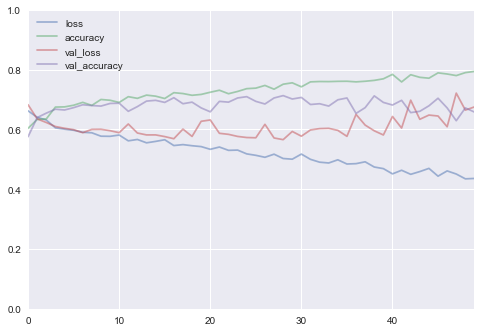

In [83]:
pd.DataFrame(model.history.history).plot(alpha=.5)
plt.gca().set_ylim(0,1)
plt.show()

In [84]:
predictions_nnet = model.predict(X_test_scaled)
predictions_nnet

array([[0.34099075, 0.6590093 ],
       [0.8229391 , 0.17706092],
       [0.9560508 , 0.04394919],
       ...,
       [0.40808693, 0.5919131 ],
       [0.5561466 , 0.44385338],
       [0.3192144 , 0.6807856 ]], dtype=float32)

In [85]:
# add predictions to df here and merge with grid pred df
X_test['nnet_pred_loss_0'] = predictions_nnet[:,0]
X_test['nnet_pred_win_1'] = predictions_nnet[:,1]
X_test['WL_TARGET'] = y_test[:,1]

/Users/andrew/anaconda3/envs/bootcamp/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/andrew/anaconda3/envs/bootcamp/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/andrew/anaconda3/envs/bootcamp/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [86]:
X_test

,PTS,AST,PF,FG_PCT,FG3M,FTM,FGM,STL,TOV,MIN_FLAT,...,PCT_STL,PCT_BLK,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS,HOME,nnet_pred_loss_0,nnet_pred_win_1,WL_TARGET
7450,6,2,2,0.600,0,0,3,0,1,22,...,0.000,1.000,0.500,0.222,0.111,0.128,1,0.340991,0.659009,0.0
93,10,1,2,0.333,0,6,2,3,0,25,...,0.750,1.000,0.000,0.200,0.308,0.256,0,0.822939,0.177061,0.0
1220,4,0,0,1.000,0,0,2,0,0,11,...,0.000,0.000,0.000,0.000,0.000,0.138,0,0.956051,0.043949,0.0
12957,16,1,2,0.857,0,4,6,0,0,26,...,0.000,0.500,0.000,0.133,0.417,0.262,0,0.125201,0.874799,1.0
19448,14,7,0,0.333,1,5,4,4,4,32,...,0.571,0.000,0.500,0.000,0.467,0.171,1,0.097067,0.902933,1.0
17130,6,0,2,0.500,0,0,3,0,0,18,...,0.000,0.000,0.000,0.333,0.429,0.182,0,0.893421,0.106579,0.0
5359,0,0,3,0.000,0,0,0,1,0,13,...,0.500,0.000,0.333,0.375,0.000,0.000,0,0.970787,0.029213,1.0
6556,4,0,2,0.400,0,0,2,1,0,22,...,0.333,0.000,0.000,0.250,0.000,0.083,0,0.081209,0.918792,1.0
12961,13,6,2,0.417,1,2,5,1,1,21,...,0.500,0.500,0.000,0.200,0.333,0.289,0,0.821494,0.178506,1.0
8876,20,0,1,0.533,0,4,8,0,0,34,...,0.000,1.000,0.750,0.083,0.333,0.250,1,0.710936,0.289064,0.0


In [87]:
dfprednnet = pd.concat(
    [df_final_awarded, X_test], axis=1)[['PLAYER_NAME', 
                                         'TEAM_NICKNAME', 
                                         'MATCHUP',
                                         'GAME_DATE',
                                         'nnet_pred_loss_0', 
                                         'nnet_pred_win_1', 
                                         'WL_TARGET', 
                                         'WL']].copy().dropna()

In [88]:
dfprednnet

,PLAYER_NAME,TEAM_NICKNAME,MATCHUP,GAME_DATE,nnet_pred_loss_0,nnet_pred_win_1,WL_TARGET,WL
31,Klay Thompson,Warriors,GSW vs. OKC,16-Oct-18,0.807803,0.192197,1.0,W
40,Giannis Antetokounmpo,Bucks,MIL @ CHA,17-Oct-18,0.753778,0.246222,1.0,W
57,Kemba Walker,Hornets,CHA vs. MIL,17-Oct-18,0.107691,0.892309,0.0,L
62,Spencer Dinwiddie,Nets,BKN @ DET,17-Oct-18,0.185112,0.814888,0.0,L
72,Blake Griffin,Pistons,DET vs. BKN,17-Oct-18,0.154333,0.845667,1.0,W
93,Jaren Jackson Jr.,Grizzlies,MEM @ IND,17-Oct-18,0.822939,0.177061,0.0,L
110,Nikola Vucevic,Magic,ORL vs. MIA,17-Oct-18,0.230641,0.769359,1.0,W
125,Mitchell Robinson,Knicks,NYK vs. ATL,17-Oct-18,0.712691,0.287309,1.0,W
135,Collin Sexton,Cavaliers,CLE @ TOR,17-Oct-18,0.105707,0.894293,0.0,L
145,Pascal Siakam,Raptors,TOR vs. CLE,17-Oct-18,0.039712,0.960288,1.0,W


In [89]:
dfprednnet['nnet_eval'] = 0
dfprednnet['nnet_total'] = 1

In [90]:
dfprednnet

,PLAYER_NAME,TEAM_NICKNAME,MATCHUP,GAME_DATE,nnet_pred_loss_0,nnet_pred_win_1,WL_TARGET,WL,nnet_eval,nnet_total
31,Klay Thompson,Warriors,GSW vs. OKC,16-Oct-18,0.807803,0.192197,1.0,W,0,1
40,Giannis Antetokounmpo,Bucks,MIL @ CHA,17-Oct-18,0.753778,0.246222,1.0,W,0,1
57,Kemba Walker,Hornets,CHA vs. MIL,17-Oct-18,0.107691,0.892309,0.0,L,0,1
62,Spencer Dinwiddie,Nets,BKN @ DET,17-Oct-18,0.185112,0.814888,0.0,L,0,1
72,Blake Griffin,Pistons,DET vs. BKN,17-Oct-18,0.154333,0.845667,1.0,W,0,1
93,Jaren Jackson Jr.,Grizzlies,MEM @ IND,17-Oct-18,0.822939,0.177061,0.0,L,0,1
110,Nikola Vucevic,Magic,ORL vs. MIA,17-Oct-18,0.230641,0.769359,1.0,W,0,1
125,Mitchell Robinson,Knicks,NYK vs. ATL,17-Oct-18,0.712691,0.287309,1.0,W,0,1
135,Collin Sexton,Cavaliers,CLE @ TOR,17-Oct-18,0.105707,0.894293,0.0,L,0,1
145,Pascal Siakam,Raptors,TOR vs. CLE,17-Oct-18,0.039712,0.960288,1.0,W,0,1


In [91]:
for index, row in dfprednnet.iterrows():
    
    if dfprednnet.loc[index, 'nnet_pred_loss_0'] > 0.5 and row['WL_TARGET'] == 0.0:
        dfprednnet.loc[index, 'nnet_eval'] = 1
    
    if dfprednnet.loc[index, 'nnet_pred_win_1'] > 0.5 and row['WL_TARGET'] == 1.0:
        dfprednnet.loc[index, 'nnet_eval'] = 1


In [92]:
dfprednnet

,PLAYER_NAME,TEAM_NICKNAME,MATCHUP,GAME_DATE,nnet_pred_loss_0,nnet_pred_win_1,WL_TARGET,WL,nnet_eval,nnet_total
31,Klay Thompson,Warriors,GSW vs. OKC,16-Oct-18,0.807803,0.192197,1.0,W,0,1
40,Giannis Antetokounmpo,Bucks,MIL @ CHA,17-Oct-18,0.753778,0.246222,1.0,W,0,1
57,Kemba Walker,Hornets,CHA vs. MIL,17-Oct-18,0.107691,0.892309,0.0,L,0,1
62,Spencer Dinwiddie,Nets,BKN @ DET,17-Oct-18,0.185112,0.814888,0.0,L,0,1
72,Blake Griffin,Pistons,DET vs. BKN,17-Oct-18,0.154333,0.845667,1.0,W,1,1
93,Jaren Jackson Jr.,Grizzlies,MEM @ IND,17-Oct-18,0.822939,0.177061,0.0,L,1,1
110,Nikola Vucevic,Magic,ORL vs. MIA,17-Oct-18,0.230641,0.769359,1.0,W,1,1
125,Mitchell Robinson,Knicks,NYK vs. ATL,17-Oct-18,0.712691,0.287309,1.0,W,0,1
135,Collin Sexton,Cavaliers,CLE @ TOR,17-Oct-18,0.105707,0.894293,0.0,L,0,1
145,Pascal Siakam,Raptors,TOR vs. CLE,17-Oct-18,0.039712,0.960288,1.0,W,1,1


In [93]:
dfprednnet['nnet_eval'].value_counts() / len(dfprednnet['nnet_eval'])

1    0.657918
0    0.342082
Name: nnet_eval, dtype: float64

In [94]:
len(dfprednnet['nnet_eval'])

1143

In [95]:
groupbynnet = dfprednnet.groupby(by='PLAYER_NAME').sum()[['nnet_eval','nnet_total']].copy()

In [96]:
groupbynnet

,nnet_eval,nnet_total
PLAYER_NAME,,
Andre Iguodala,20,22
Blake Griffin,13,17
Bojan Bogdanovic,11,16
Bryn Forbes,12,22
Buddy Hield,11,22
Collin Sexton,15,21
D'Angelo Russell,8,14
Damian Lillard,17,21
Danilo Gallinari,14,18


In [97]:
dfnnet = pd.DataFrame(groupbynnet)
dfnnet['differential_nnet'] = 0
dfnnet['nnet_wrong'] = 0
dfnnet['nnet_wrong_pct'] = 0
dfnnet['nnet_correct_pct'] = 0

for index, row in dfnnet.iterrows():
    
    total_nnet = row['nnet_total']
    
    correct_nnet = row['nnet_eval']
    
    wrong_nnet = total_nnet - correct_nnet
    dfnnet.loc[index, 'nnet_wrong'] = wrong_nnet
    
    differential_nnet = (correct_nnet - wrong_nnet) / total_nnet
    dfnnet.loc[index, 'differential_nnet'] = differential_nnet
    
    correct_pct = correct_nnet / total_nnet
    dfnnet.loc[index, 'nnet_correct_pct'] = correct_pct

    wrong_pct = wrong_nnet / total_nnet
    dfnnet.loc[index, 'nnet_wrong_pct'] = wrong_pct

In [98]:
# dfnnet.sort_values(by='differential_nnet').head(20)
dfnnet

,nnet_eval,nnet_total,differential_nnet,nnet_wrong,nnet_wrong_pct,nnet_correct_pct
PLAYER_NAME,,,,,,
Andre Iguodala,20,22,0.818182,2,0.090909,0.909091
Blake Griffin,13,17,0.529412,4,0.235294,0.764706
Bojan Bogdanovic,11,16,0.375000,5,0.312500,0.687500
Bryn Forbes,12,22,0.090909,10,0.454545,0.545455
Buddy Hield,11,22,0.000000,11,0.500000,0.500000
Collin Sexton,15,21,0.428571,6,0.285714,0.714286
D'Angelo Russell,8,14,0.142857,6,0.428571,0.571429
Damian Lillard,17,21,0.619048,4,0.190476,0.809524
Danilo Gallinari,14,18,0.555556,4,0.222222,0.777778


## predictions df

In [99]:
df

,correct_grid,wrong_grid,differential_grid,correct_grid_pct,wrong_grid_pct
PLAYER_NAME,,,,,
Andre Iguodala,17,5,0.545455,0.772727,0.227273
Blake Griffin,10,7,0.176471,0.588235,0.411765
Bojan Bogdanovic,11,5,0.375000,0.687500,0.312500
Bryn Forbes,13,9,0.181818,0.590909,0.409091
Buddy Hield,15,7,0.363636,0.681818,0.318182
Collin Sexton,15,6,0.428571,0.714286,0.285714
D'Angelo Russell,8,6,0.142857,0.571429,0.428571
Damian Lillard,14,7,0.333333,0.666667,0.333333
Danilo Gallinari,12,6,0.333333,0.666667,0.333333


In [100]:
dfnnet

,nnet_eval,nnet_total,differential_nnet,nnet_wrong,nnet_wrong_pct,nnet_correct_pct
PLAYER_NAME,,,,,,
Andre Iguodala,20,22,0.818182,2,0.090909,0.909091
Blake Griffin,13,17,0.529412,4,0.235294,0.764706
Bojan Bogdanovic,11,16,0.375000,5,0.312500,0.687500
Bryn Forbes,12,22,0.090909,10,0.454545,0.545455
Buddy Hield,11,22,0.000000,11,0.500000,0.500000
Collin Sexton,15,21,0.428571,6,0.285714,0.714286
D'Angelo Russell,8,14,0.142857,6,0.428571,0.571429
Damian Lillard,17,21,0.619048,4,0.190476,0.809524
Danilo Gallinari,14,18,0.555556,4,0.222222,0.777778


In [101]:
df_prediction_eval = pd.concat([df, dfnnet], axis=1)[['nnet_correct_pct',
                                                      'nnet_wrong_pct',
                                                      'correct_grid_pct',
                                                      'wrong_grid_pct']]

In [102]:
df_prediction_eval

,nnet_correct_pct,nnet_wrong_pct,correct_grid_pct,wrong_grid_pct
PLAYER_NAME,,,,
Andre Iguodala,0.909091,0.090909,0.772727,0.227273
Blake Griffin,0.764706,0.235294,0.588235,0.411765
Bojan Bogdanovic,0.687500,0.312500,0.687500,0.312500
Bryn Forbes,0.545455,0.454545,0.590909,0.409091
Buddy Hield,0.500000,0.500000,0.681818,0.318182
Collin Sexton,0.714286,0.285714,0.714286,0.285714
D'Angelo Russell,0.571429,0.428571,0.571429,0.428571
Damian Lillard,0.809524,0.190476,0.666667,0.333333
Danilo Gallinari,0.777778,0.222222,0.666667,0.333333


In [107]:
data = df_prediction_eval[['nnet_correct_pct', 
                           'nnet_wrong_pct',
                           'correct_grid_pct',
                           'wrong_grid_pct']].sort_values(by='nnet_correct_pct', ascending=False)[:]

# cannot match order of both subplots properly with name col instead of indexed
# data = df_prediction_eval[['nnet_correct_pct', 
#                            'nnet_wrong_pct',
#                            'correct_grid_pct',
#                            'wrong_grid_pct',
#                           'PLAYER_NAME',
#                           ]]

# data.sort_values(by='PLAYER_NAME', ascending=False, inplace=True)


# create subplot
fig = make_subplots(
    rows=1, cols=2,
#     subplot_titles=('Neural Net', 'SVM'),
    shared_yaxes=True,
    shared_xaxes=True
)

# correct nnet trace
fig.add_trace(go.Bar(
        y=data.index.values,
#         y=data['PLAYER_NAME'],
        x=data['nnet_correct_pct'],
        name='Net Correct %',
        marker_color='teal',
        orientation='h',
        hovertext=data['nnet_correct_pct']),
    row=1, col=1,
)

# wrong nnet trace
fig.add_trace(go.Bar(
        y=data.index.values,
#         y=data['PLAYER_NAME'],
        x=data['nnet_wrong_pct'],
        name='Net: Wrong %',
        marker_color='goldenrod',
        orientation='h',
        hovertext=data['nnet_wrong_pct']),
    row=1, col=1,
)

# correct svm trace
fig.add_trace(go.Bar(
        y=data.index.values,
        x=data['correct_grid_pct'],
        name='SVM: Correct %',
        marker_color='teal',
        orientation='h',
#         hovertext=data['PLAYER_NAME']
    ),
    row=1, col=2,
)

# wrong svm trace
fig.add_trace(go.Bar(
        y=data.index.values,
        x=data['wrong_grid_pct'],
        name='SVM: Wrong %',
        marker_color='goldenrod',
        orientation='h',
#         hovertext=data['PLAYER_NAME']
    ),
    row=1, col=2,
)

# axes, title, etc.
fig.update_layout(
    xaxis=dict(
        showgrid=True,
        showline=True,
        showticklabels=True,
        zeroline=False,
#         domain=[0, 1],
#         title_text='Net',
        titlefont=dict(size=20),
    ),
    
    xaxis2=dict(
        showgrid=True,
        showline=True,
        showticklabels=True,
        zeroline=False,
#         domain=[0, 1],
#         title_text='SVM',
        titlefont=dict(size=20),
    ),
    
    yaxis=dict(
        showgrid=True,
        showline=True,
        showticklabels=True,
        zeroline=True,
#         title_text='Players',
        ticktext=data.index.values,
        tickmode='array',
        titlefont=dict(size=20),
    ),
    title={
        'text': 'Win/Loss Predictions (NBA Awards)',
        'y':.995,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font':{
            'size':30
        }
    },
    
    annotations=[
        go.layout.Annotation(
            x=.5,
            y=-.0125,
            showarrow=False,
            text='Prediction Accuracy per Player',
            xref="paper",
            yref="paper",
            font=dict(
                size=20,
            )
        ),
        
        go.layout.Annotation(
            x=.15,
            y=1.005,
            showarrow=False,
            text='Neural Net',
            xref="paper",
            yref="paper",
            font=dict(
                size=18,
            )
        ),
        
        go.layout.Annotation(
            x=.80,
            y=1.005,
            showarrow=False,
            text='SVM',
            xref="paper",
            yref="paper",
            font=dict(
                size=18,
            )
        ),
    ],
    barmode='stack',
    xaxis_tickformat='%',
    xaxis2_tickformat='%',
    paper_bgcolor='rgb(248, 248, 248)',
    plot_bgcolor='rgb(248, 248, 248)',
    margin=dict(l=75, r=75, t=100, b=75),
    showlegend=True,
    autosize=False,
    width=900, height=5000,
)

fig.show()

In [0]:
print('Neural Net Worst:')
df_prediction_eval.sort_values(by='nnet_correct_pct')

Neural Net Worst:


,nnet_correct_pct,correct_grid_pct
PLAYER_NAME,,
LeBron James,0.333333,0.333333
Deandre Ayton,0.380952,0.380952
Derrick Rose,0.416667,0.583333
Josh Richardson,0.470588,0.529412
James Harden,0.473684,0.736842
Spencer Dinwiddie,0.476190,0.476190
Jae Crowder,0.478261,0.652174
Mitchell Robinson,0.500000,0.772727
Ed Davis,0.529412,0.235294


In [0]:
print('SVM Worst:')
df_prediction_eval.sort_values(by='correct_grid_pct')

SVM Worst:


,nnet_correct_pct,correct_grid_pct
PLAYER_NAME,,
Ed Davis,0.529412,0.235294
LeBron James,0.333333,0.333333
Klay Thompson,0.588235,0.352941
Deandre Ayton,0.380952,0.380952
Luka Doncic,0.565217,0.434783
Domantas Sabonis,0.650000,0.450000
Myles Turner,0.882353,0.470588
Thomas Bryant,0.684211,0.473684
Kevin Huerter,0.578947,0.473684


In [0]:
print('Neural Net Best:')
df_prediction_eval.sort_values(by='nnet_correct_pct', ascending=False)

Neural Net Best:


,nnet_correct_pct,correct_grid_pct
PLAYER_NAME,,
Kyrie Irving,1.000000,0.666667
Myles Turner,0.882353,0.470588
Joel Embiid,0.882353,0.764706
Andre Iguodala,0.863636,0.772727
Stephen Curry,0.857143,0.809524
Derrick White,0.842105,0.631579
John Collins,0.833333,0.916667
Eric Bledsoe,0.823529,0.588235
Paul George,0.823529,0.705882


In [0]:
print('SVM Best:')
df_prediction_eval.sort_values(by='correct_grid_pct', ascending=False)

SVM Best:


,nnet_correct_pct,correct_grid_pct
PLAYER_NAME,,
John Collins,0.833333,0.916667
Jarrett Allen,0.650000,0.850000
Draymond Green,0.750000,0.812500
Stephen Curry,0.857143,0.809524
De'Aaron Fox,0.800000,0.800000
Jrue Holiday,0.733333,0.800000
Andre Iguodala,0.863636,0.772727
Mitchell Robinson,0.500000,0.772727
Joel Embiid,0.882353,0.764706


# random forest

In [0]:
df_forest = df_final_awarded[features].copy()

In [0]:
target = df_forest["WL"]
target_names = ["W", "L"]

In [0]:
encoder = LabelEncoder()
encoder.fit(df_forest['Home/Away'])
home = encoder.transform(df_forest['Home/Away'])
df_forest['HOME'] = home

In [0]:
data = df_forest.drop(["WL",'Home/Away'], axis=1)
feature_names = data.columns
data.head()

,PTS,AST,PF,FG_PCT,FG3M,FTM,FGM,STL,TOV,MIN_FLAT,...,PCT_REB,PCT_AST,PCT_TOV,PCT_STL,PCT_BLK,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS,HOME
4,7,7,1,0.143,1,2,2,0,3,29,...,0.129,0.389,0.333,0.000,0.0,0.25,0.077,0.143,0.103,1
8,7,3,2,0.500,2,1,2,0,2,25,...,0.091,0.429,0.200,0.000,0.0,0.00,0.182,0.125,0.152,1
14,23,2,3,0.429,1,4,9,1,5,37,...,0.250,0.133,0.385,0.200,0.4,0.75,0.200,0.214,0.333,0
20,1,0,0,0.000,0,1,0,0,0,13,...,0.125,0.000,0.000,0.000,0.0,0.00,0.000,0.125,0.045,0
24,32,9,4,0.550,5,5,11,1,3,37,...,0.167,0.360,0.200,0.167,0.0,0.00,0.182,0.308,0.356,1


In [0]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [0]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.605424321959755

In [0]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.6754155730533683

In [0]:
features = sorted(zip(rf.feature_importances_, feature_names), reverse=True)

In [0]:
df_feature_importance = pd.DataFrame(features)
df_feature_importance.rename(columns={0:'pct', 1:'feature'}, inplace=True)
df_feature_importance.sort_values(by='pct', ascending=False, inplace=True)
df_feature_importance

,pct,feature
0,0.053309,TS_TEAM_AVG
1,0.052624,EFG_TEAM_AVG
2,0.033101,GAMESCORE
3,0.025412,TS_PCT
4,0.024096,PCT_PTS
5,0.023960,PCT_FGM
6,0.023778,DIST
7,0.023147,SPD
8,0.022449,TS_EVAL
9,0.022295,EFG_EVAL


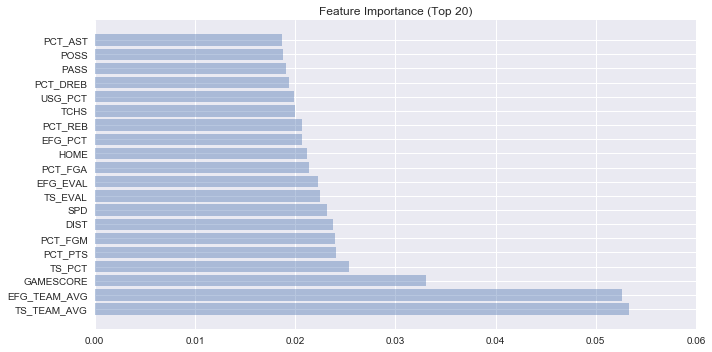

In [0]:
names = df_feature_importance['feature'][:20]

values = df_feature_importance['pct'][:20]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
yvals = range(len(names))
ax.barh(yvals, values, align='center', alpha=0.4)
ax.set_xlim((0,.06))
plt.yticks(yvals,names)
plt.title('RF Feature Importance: Win/Loss Classification NBA Awards (Top 20)')
plt.tight_layout()

plt.savefig('feature_importance_wl_awards_top20.png', dpi=600)

plt.show()

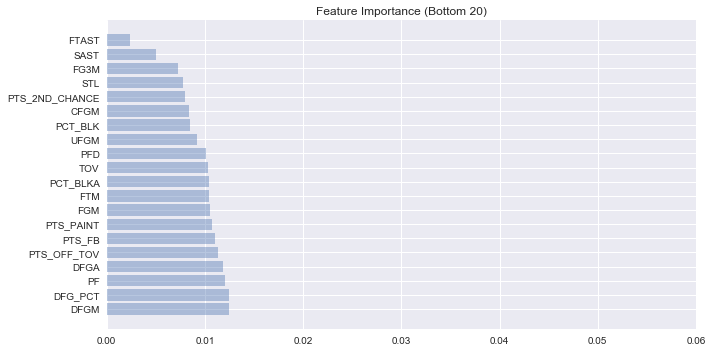

In [0]:
names = df_feature_importance['feature'].tail(20)

values = df_feature_importance['pct'].tail(20)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
yvals = range(len(names))
ax.barh(yvals, values, align='center', alpha=0.4)
ax.set_xlim((0,.06))
plt.yticks(yvals,names)
plt.title('RF Feature Importance: Win/Loss Classification NBA Awards (Bottom 20)')
plt.tight_layout()

plt.savefig('feature_importance_wl_awards_bottom20.png', dpi=600)

plt.show()